In [34]:
from chebGreen import ChebGreen
import numpy as np
import matplotlib.pyplot as plt

from chebGreen.chebpy2 import Quasimatrix
from chebGreen.chebpy2.chebpy import chebfun
from chebGreen.chebpy2 import Chebfun2

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [35]:
Theta = [1.0,2.0,3.0]
domain = [-1,1,-1,1]
generateData = True
script = "generate_example"
example = "advection_diffusion"
dirichletBC = True
advecDiff = ChebGreen(Theta, domain, generateData, script, example, dirichletBC)

Generating dataset for example 'advection_diffusion'
### Example = advection_diffusion @ theta = 1 ###
Number of samples: 100
Length scale: 0.01
Nf: 500
Nu: 500
Noise: 0%
---------------------------------------
Step = 1/100
Step = 2/100
Step = 3/100
Step = 4/100
Step = 5/100
Step = 6/100
Step = 7/100
Step = 8/100
Step = 9/100
Step = 10/100
Step = 11/100
Step = 12/100
Step = 13/100
Step = 14/100
Step = 15/100
Step = 16/100
Step = 17/100
Step = 18/100
Step = 19/100
Step = 20/100
Step = 21/100
Step = 22/100
Step = 23/100
Step = 24/100
Step = 25/100
Step = 26/100
Step = 27/100
Step = 28/100
Step = 29/100
Step = 30/100
Step = 31/100
Step = 32/100
Step = 33/100
Step = 34/100
Step = 35/100
Step = 36/100
Step = 37/100
Step = 38/100
Step = 39/100
Step = 40/100
Step = 41/100
Step = 42/100
Step = 43/100
Step = 44/100
Step = 45/100
Step = 46/100
Step = 47/100
Step = 48/100
Step = 49/100
Step = 50/100
Step = 51/100
Step = 52/100
Step = 53/100
Step = 54/100
Step = 55/100
Step = 56/100
Step = 57/100


cp: savedModels/advection_diffusion/settings.ini: No such file or directory


Chebfun model added for example 'advection_diffusion' at Theta = 1.00

Training greenlearning model for example 'advection_diffusion' at Theta = 2.00
Training with Adam:
Loss at epoch 100: Training = 2.948E-02, Validation = 2.197E-02
Loss at epoch 200: Training = 5.652E-03, Validation = 6.715E-03
Loss at epoch 300: Training = 2.761E-03, Validation = 3.277E-03
Loss at epoch 400: Training = 2.007E-03, Validation = 2.438E-03
Loss at epoch 500: Training = 1.601E-03, Validation = 1.981E-03
Loss at epoch 600: Training = 1.274E-03, Validation = 1.582E-03
Loss at epoch 700: Training = 9.977E-04, Validation = 1.223E-03
Loss at epoch 800: Training = 7.820E-04, Validation = 9.320E-04
Loss at epoch 900: Training = 6.235E-04, Validation = 7.079E-04
Loss at epoch 1000: Training = 5.120E-04, Validation = 5.577E-04
Loss at epoch 1100: Training = 4.344E-04, Validation = 4.577E-04
Loss at epoch 1200: Training = 3.857E-04, Validation = 3.750E-04
Loss at epoch 1300: Training = 3.291E-04, Validation = 3.22

In [36]:
advecDiff.G

{1.0: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     63       [-0.000 -0.000 -0.000 -0.000]
 vertical scale = 0.676843,
 2.0: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     63       [-0.000 -0.000 -0.000 -0.000]
 vertical scale = 0.501478,
 3.0: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     63       [-0.000 0.000 -0.000 -0.000]
 vertical scale = 0.367499}

CPU times: user 26 s, sys: 37 s, total: 1min 2s
Wall time: 16.8 s


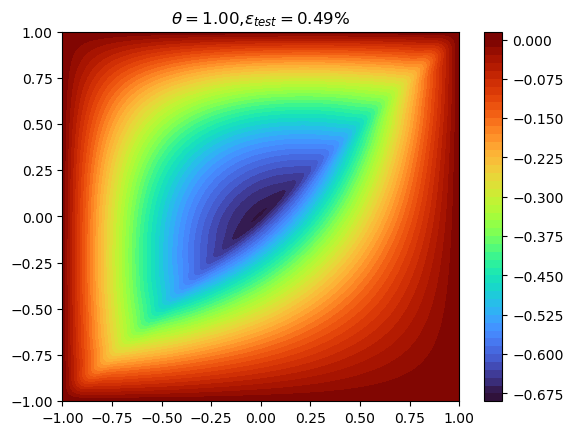

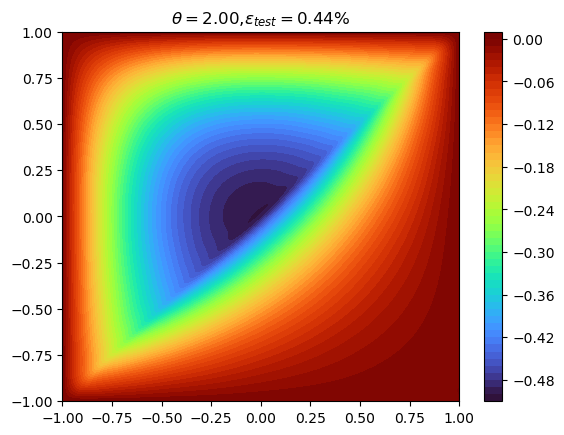

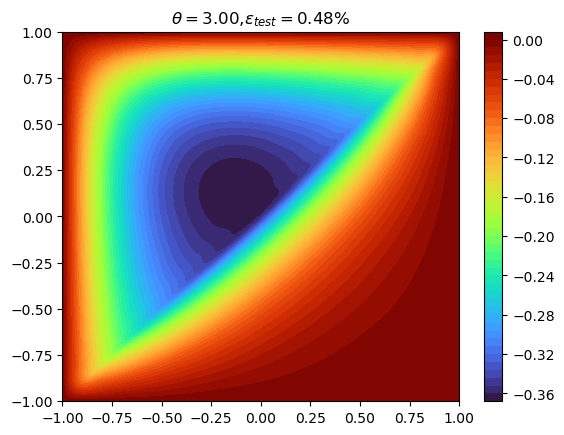

In [37]:
%%time
for t in Theta:
    fig = plt.figure()
    advecDiff.G[t].plot(fig = fig)
    error = advecDiff.computeEmpiricalError(t)
    plt.title(f"$\\theta = {{{t:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

<Axes: >

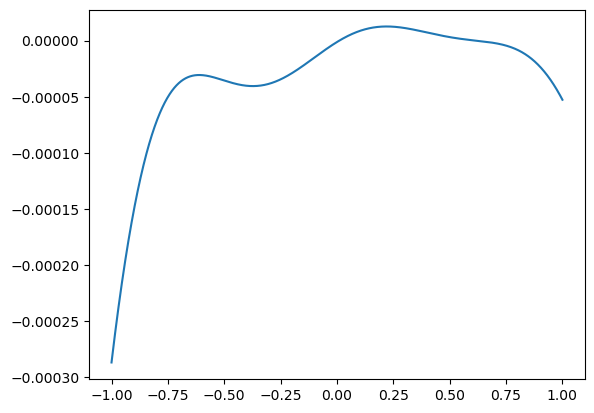

In [38]:
advecDiff.N[3.0].plot()

In [39]:
%%time
U, S, V = [],[],[]
for t in Theta:
    u,s,v = advecDiff.G[t].svd()
    U.append(u)
    S.append(s)
    V.append(v)

CPU times: user 8.82 s, sys: 19.7 s, total: 28.5 s
Wall time: 4.64 s


In [40]:
t = 0
u,s,v = U[t],S[t],V[t]

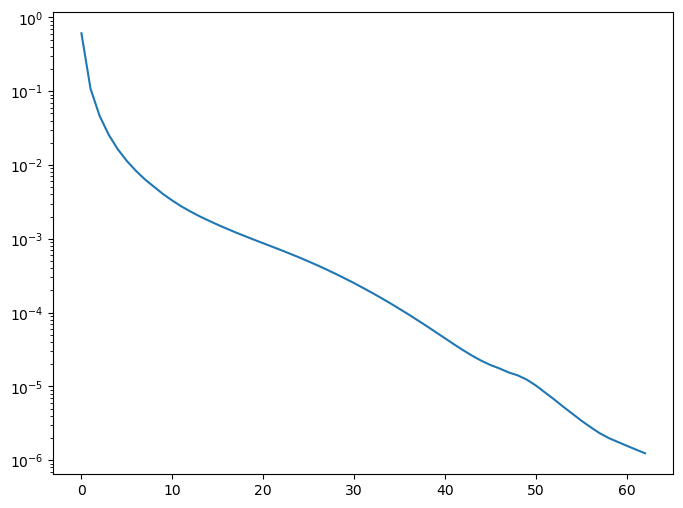

In [41]:
fig = plt.figure(figsize = (8,6))
plt.semilogy(s)

(-1.0, 1.0)

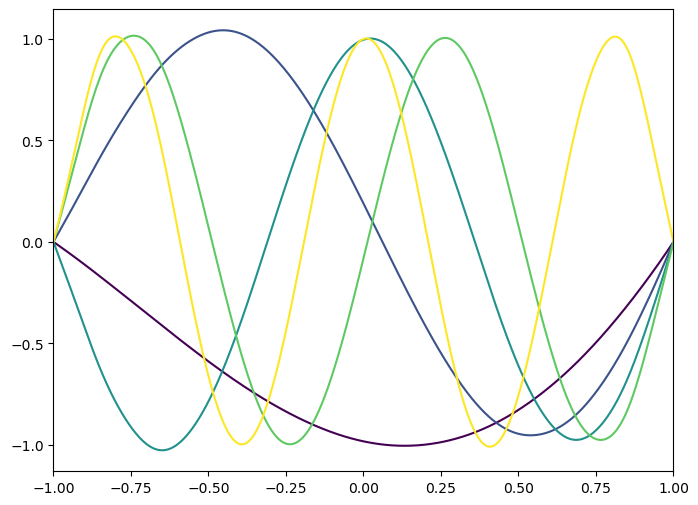

In [42]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([-1,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [43]:
%%time
theta_ = 2.5
Ginterp, Ninterp = advecDiff.generateNewModel(theta_)

CPU times: user 23.4 s, sys: 35.9 s, total: 59.3 s
Wall time: 13.1 s


In [44]:
Ginterp

chebfun2 object
     domain       rank               corner values
[-1.0,1.0] x [-1.0,1.0]     63       [-0.000 0.000 -0.000 0.000]
vertical scale = 0.428243

In [45]:
%%time
u,s,v = Ginterp.svd()

CPU times: user 4.26 s, sys: 8.73 s, total: 13 s
Wall time: 2.33 s


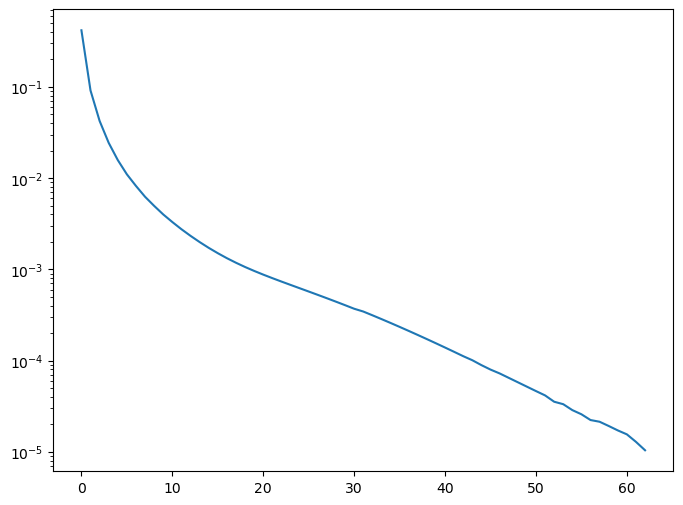

In [46]:
fig = plt.figure(figsize = (8,6))
plt.semilogy(s)

(-1.0, 1.0)

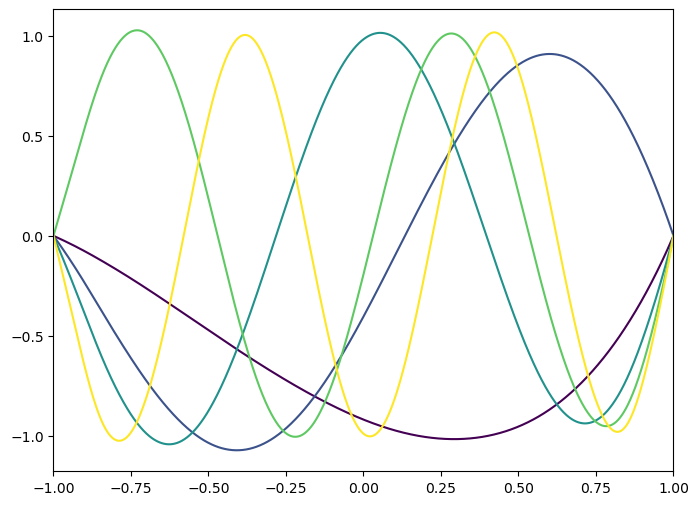

In [47]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([-1,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [48]:
validation = ChebGreen([theta_], domain, generateData, script, example, dirichletBC)

Generating dataset for example 'advection_diffusion'
### Example = advection_diffusion @ theta = 2.5 ###
Number of samples: 100
Length scale: 0.01
Nf: 500
Nu: 500
Noise: 0%
---------------------------------------
Step = 1/100
Step = 2/100
Step = 3/100
Step = 4/100
Step = 5/100
Step = 6/100
Step = 7/100
Step = 8/100
Step = 9/100
Step = 10/100
Step = 11/100
Step = 12/100
Step = 13/100
Step = 14/100
Step = 15/100
Step = 16/100
Step = 17/100
Step = 18/100
Step = 19/100
Step = 20/100
Step = 21/100
Step = 22/100
Step = 23/100
Step = 24/100
Step = 25/100
Step = 26/100
Step = 27/100
Step = 28/100
Step = 29/100
Step = 30/100
Step = 31/100
Step = 32/100
Step = 33/100
Step = 34/100
Step = 35/100
Step = 36/100
Step = 37/100
Step = 38/100
Step = 39/100
Step = 40/100
Step = 41/100
Step = 42/100
Step = 43/100
Step = 44/100
Step = 45/100
Step = 46/100
Step = 47/100
Step = 48/100
Step = 49/100
Step = 50/100
Step = 51/100
Step = 52/100
Step = 53/100
Step = 54/100
Step = 55/100
Step = 56/100
Step = 57/10

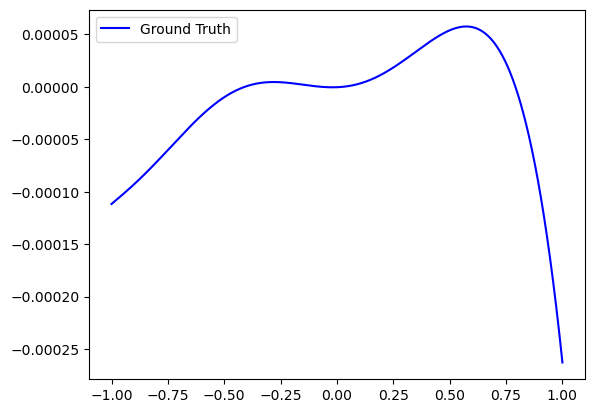

In [49]:
fig = plt.figure()
advecDiff.N[1.0].plot(fig = fig, color = 'b')
plt.legend(['Ground Truth', 'Interpolated'])

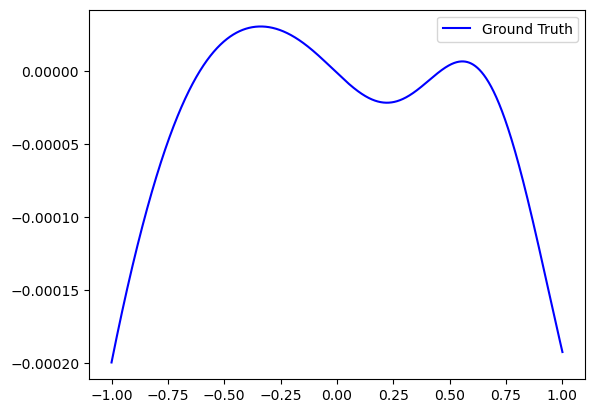

In [50]:
fig = plt.figure()
advecDiff.N[2.0].plot(fig = fig, color = 'b')
plt.legend(['Ground Truth', 'Interpolated'])

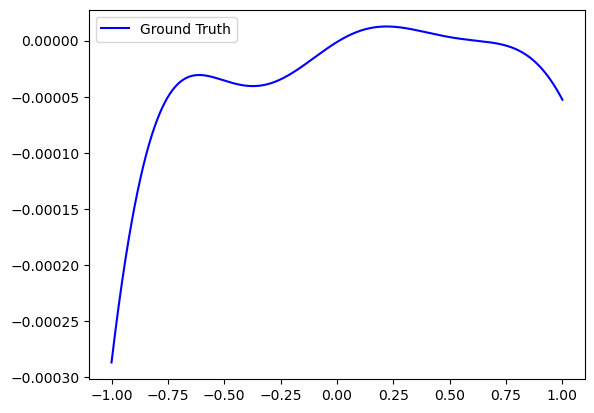

In [51]:
fig = plt.figure()
advecDiff.N[3.0].plot(fig = fig, color = 'b')
plt.legend(['Ground Truth', 'Interpolated'])

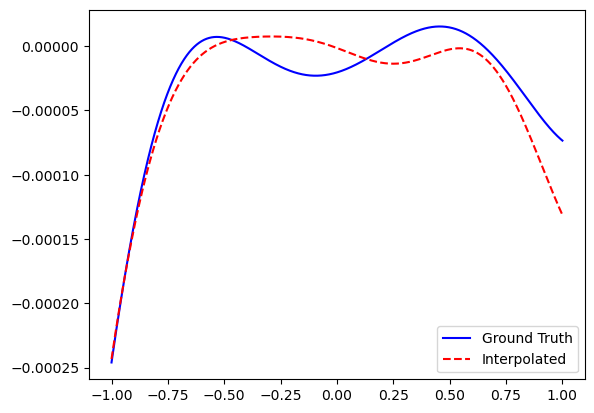

In [52]:
fig = plt.figure()
validation.N[theta_].plot(fig = fig, color = 'b')
Ninterp.plot(fig = fig, color = 'r', linestyle = '--')
plt.legend(['Ground Truth', 'Interpolated'])

CPU times: user 8.29 s, sys: 12.4 s, total: 20.7 s
Wall time: 5.18 s


Text(0.5, 1.0, 'Interpolated Model $\\theta = {2.50}$,$\\epsilon_{test} = {0.58}\\%$')

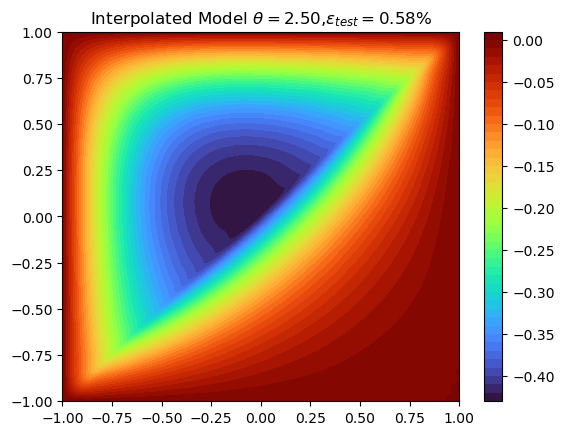

In [53]:
%%time
fig = plt.figure()
Ginterp.plot(fig = fig)
error = advecDiff.computeEmpiricalError(theta_)
plt.title(f"Interpolated Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

CPU times: user 8.75 s, sys: 11.9 s, total: 20.7 s
Wall time: 5.45 s


Text(0.5, 1.0, 'Validation Model $\\theta = {2.50}$,$\\epsilon_{test} = {0.38}\\%$')

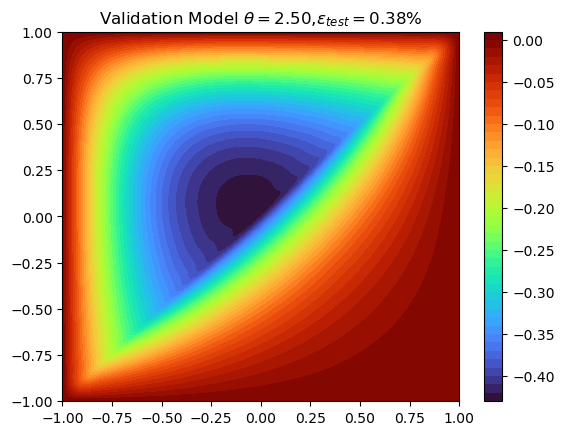

In [54]:
%%time
fig = plt.figure()
validation.G[theta_].plot(fig = fig)
error = validation.computeEmpiricalError(theta_)
plt.title(f"Validation Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

In [55]:
# vmin, vmax = -0.68,0.13
# Gplot = validation.G[theta_]

# xx = np.linspace(domain[0],domain[1],2000)
# yy = np.linspace(domain[2],domain[3],2000)
# x, y = np.meshgrid(xx,yy)
# Gplot = Gplot[x,y]

# fig = plt.figure(figsize = (13,10), frameon=False)
# plt.axis('off')
# plt.gca().set_aspect('equal', adjustable='box')
# levels = np.linspace(vmin, vmax, 50, endpoint = True)
# plt.contourf(x,y,Gplot, levels = levels, cmap = 'jet', vmin = vmin, vmax = vmax)
# # ticks = np.linspace(vmin, vmax, 10, endpoint=True)
# # cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)

# fig.savefig('advecdiff-E.png', dpi = fig.dpi, bbox_inches='tight', pad_inches=0)

In [56]:
def compareGreen1D(interpModel, exactModel, vmin = None, vmax = None):
    domain = interpModel.domain
    xx = np.linspace(domain[2],domain[3],2000)
    yy = np.linspace(domain[0],domain[1],2000)
    x, s = np.meshgrid(xx,yy)
    
    if vmin is None:
        vmin = min(interpModel.min,exactModel.min)
    if vmax is None:
        vmax = max(interpModel.max,exactModel.max)
        
    plt.figure(figsize = (16,6))
    plt.subplot(121)
    
    GInterp = interpModel[x,s]
    
    levels = np.linspace(vmin, vmax, 50, endpoint = True)
    ticks = np.linspace(vmin, vmax, 10, endpoint=True)
    
    surf = plt.contourf(x, s, GInterp, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    plt.gca().set_aspect('equal', adjustable='box')
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('$x$', fontsize = 11)
    plt.ylabel('$s$', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Interpolated", fontsize = 14)
    
    GExact = exactModel[x,s]
    
    plt.subplot(122)
    plt.gca().set_aspect('equal', adjustable='box')
    surf = plt.contourf(x, s, GExact, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('x', fontsize = 11)
    plt.ylabel('s', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Data", fontsize = 14)

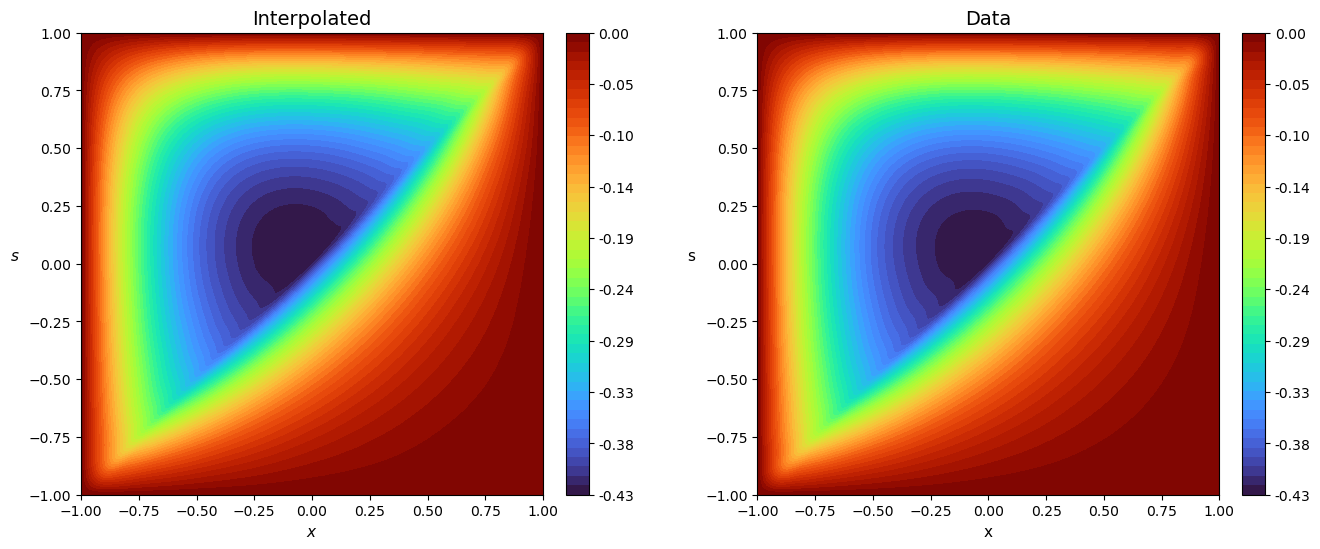

In [57]:
compareGreen1D(Ginterp,validation.G[theta_])

In [58]:
# vmin, vmax = -0.4,0.5
# theta = Theta[0]
# G = mean.G[theta]

# xx = np.linspace(domain[0],domain[1],2000)
# yy = np.linspace(domain[2],domain[3],2000)
# x, y = np.meshgrid(xx,yy)
# G = G[x,y]

# fig = plt.figure(figsize = (13,10), frameon=False)
# plt.axis('off')
# plt.gca().set_aspect('equal', adjustable='box')
# levels = np.linspace(vmin, vmax, 50, endpoint = True)
# plt.contourf(x,y,G, levels = levels, cmap = 'jet', vmin = vmin, vmax = vmax)
# # ticks = np.linspace(vmin, vmax, 10, endpoint=True)
# # cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)

# fig.savefig('interp-A.png', dpi = fig.dpi, bbox_inches='tight', pad_inches=0)

In [59]:
from chebGreen.utils import runCustomScript, computeEmpiricalError
from chebGreen.greenlearning.utils import DataProcessor
from pathlib import Path

In [60]:
# Compute error for paper
Nsample = 100
lmbda = 0.01
Nf = 500
Nu = 500
noise_level = 0
seed = 42
saveSuffix = "validation"

In [61]:
%%time
Error = []
for theta in Theta:
    datapath = f"datasets/{example}-{saveSuffix}/{theta:.2f}.mat"
    if Path(datapath).is_file():
        print(f"Validation dataset already present for Theta = {theta:.2f}")
    else:
        print("Generating dataset for")
        runCustomScript(script,example,theta,Nsample,lmbda,Nf,Nu,noise_level, seed, saveSuffix)
    data = DataProcessor(datapath)
    data.generateDataset(trainRatio = 0)
    error = advecDiff.computeEmpiricalError(theta, data)
    Error.append(error)
    print(f"Empirical error for model at Theta = {theta:.2f} is {error}")    

Validation dataset already present for Theta = 1.00
Empirical error for model at Theta = 1.00 is 0.003671825795362514
Validation dataset already present for Theta = 2.00
Empirical error for model at Theta = 2.00 is 0.003639269388912763
Validation dataset already present for Theta = 3.00
Empirical error for model at Theta = 3.00 is 0.003861823240004407
CPU times: user 5min 33s, sys: 8min 16s, total: 13min 50s
Wall time: 3min 25s


In [62]:
%%time
datapath = f"datasets/{example}-{saveSuffix}/{theta_:.2f}.mat"
if Path(datapath).is_file():
    print(f"Validation dataset already present for Theta = {theta:.2f}")
else:
    runCustomScript(script,example,theta_,Nsample,lmbda,Nf,Nu,noise_level, seed, saveSuffix)
data = DataProcessor(datapath)
data.generateDataset(trainRatio = 0)
error = advecDiff.computeEmpiricalError(theta_, data)
Error.append(error)
print(f"Empirical error for interpolated model at Theta = {theta:.2f} is {error}")  
error = validation.computeEmpiricalError(theta_, data)
print(f"Empirical error for validation model at Theta = {theta:.2f} is {error}")
Error.append(error)

Validation dataset already present for Theta = 3.00
Empirical error for interpolated model at Theta = 3.00 is 0.006175664204487631
Empirical error for validation model at Theta = 3.00 is 0.002918664430153413
CPU times: user 3min 50s, sys: 5min 2s, total: 8min 52s
Wall time: 2min 10s


In [63]:
Error

[0.003671825795362514,
 0.003639269388912763,
 0.003861823240004407,
 0.006175664204487631,
 0.002918664430153413]